In [1]:
import numpy as np
import matplotlib.pyplot as plt
import processing
import dsdtools
import scipy.signal as sng
import model_constructor

Using TensorFlow backend.


In [2]:
dsd = dsdtools.DB(root_dir='DSD100subset/')

In [3]:
track = dsd.load_dsd_tracks()[0]
amplitude, phase = processing.fourier_transform(track.audio)


In [4]:
phase.shape

(2049, 2, 1898)

In [6]:
dt_phase = np.diff(phase)
dk_phase = np.diff(phase, axis=0)

#pad the differences to have the same shape as the phase

dt_phase = np.concatenate([np.zeros((phase.shape[0], phase.shape[1], 1)), dt_phase], axis=2)
dk_phase = np.concatenate([np.zeros((1, phase.shape[1], phase.shape[2])), dk_phase], axis=0)

dt_phase =  (dt_phase + np.pi) % (2 * np.pi) - np.pi
dk_phase = (dk_phase + np.pi) % (2 * np.pi) - np.pi

print(dt_phase.shape, dk_phase.shape)


(2049, 2, 1898) (2049, 2, 1898)


(2049, 2, 1898) 3.141592564306655 -3.141592653589793


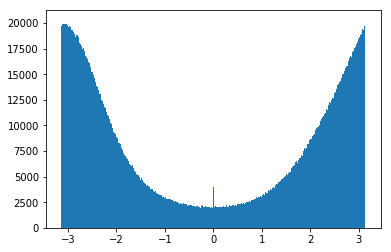

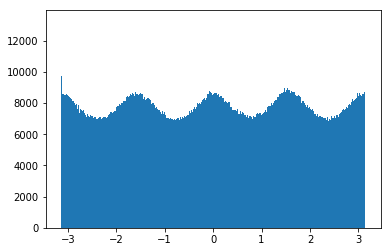

In [7]:
%matplotlib inline
hist_bins = np.linspace( -np.pi, np.pi, 500)

print(dt_phase.shape, np.max(dt_phase), np.min(dt_phase))

plt.hist(dk_phase[:,0,:].flatten(), bins = hist_bins)
plt.show()
plt.hist(dt_phase[:,1,:].flatten(), bins = hist_bins)
plt.show()

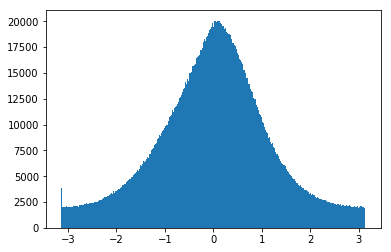

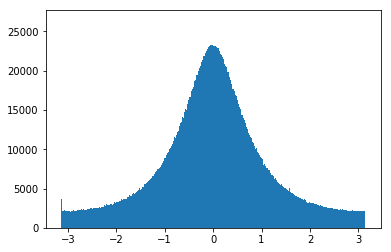

In [8]:
dk_phase = dk_phase + np.pi
time_shift = 0.5 * np.pi * np.arange(phase.shape[0])
dt_phase = (dt_phase.T - time_shift).T
dk_phase = (dk_phase + np.pi) % (2 * np.pi) - np.pi
dt_phase = (dt_phase + np.pi) % (2 * np.pi) - np.pi
plt.hist(dk_phase[:,0,:].flatten(), bins = hist_bins)
plt.show()
plt.hist(dt_phase[:,1,:].flatten(), bins = hist_bins)
plt.show()

In [9]:
dt_phase.shape, dk_phase.shape

((2049, 2, 1898), (2049, 2, 1898))

In [5]:
amplitude_out, phase_out = processing.make_train_input([track], 5)

In [8]:
model = model_constructor.make_compile_model('drums')

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 2049, 2, 11)  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 2049, 4, 11)  0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 45078)        0           input_3[0][0]                    
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 90156)        0           input_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (D

In [10]:
tracks = dsd.load_dsd_tracks()
train_features = processing.make_train_input(tracks)
target = processing.make_target_data(tracks, 'drums')

model.fit(train_features, target, epochs = 5, batch_size = 36)

Epoch 1/5
 720/7435 [=>............................] - ETA: 26:46 - loss: 0.12 - ETA: 13:49 - loss: 0.10 - ETA: 9:24 - loss: 0.0779 - ETA: 7:14 - loss: 0.061 - ETA: 5:53 - loss: 0.050 - ETA: 5:02 - loss: 0.043 - ETA: 4:22 - loss: 0.037 - ETA: 3:53 - loss: 0.033 - ETA: 3:30 - loss: 0.029 - ETA: 3:12 - loss: 0.026 - ETA: 2:57 - loss: 0.024 - ETA: 2:45 - loss: 0.022 - ETA: 2:34 - loss: 0.020 - ETA: 2:25 - loss: 0.019 - ETA: 2:17 - loss: 0.017 - ETA: 2:10 - loss: 0.016 - ETA: 2:04 - loss: 0.015 - ETA: 1:58 - loss: 0.014 - ETA: 1:53 - loss: 0.014 - ETA: 1:49 - loss: 0.0134

InternalError: GPU sync failed

In [ ]:
amplitude_out, phase_out = processing.make_train_input([track])

In [ ]:
input_shape = amplitude_out[0].shape

for counter, i in enumerate(amplitude_out):
    if i.shape != input_shape:
        print(i.shape, counter)
        break
        

In [ ]:
input_shape = phase_out[0].shape

for counter, i in enumerate(phase_out):
    if i.shape != input_shape:
        print(i.shape, counter)
        break
        

In [ ]:
phase_out[0].swapaxes(0,1)

In [ ]:
l = [i for i in range(10)]
for i in l:
    i = 10

In [ ]:
l
